DS Assignment 18

Forecasting

Airlines data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
data.shape

(96, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Passengers'}>]], dtype=object)

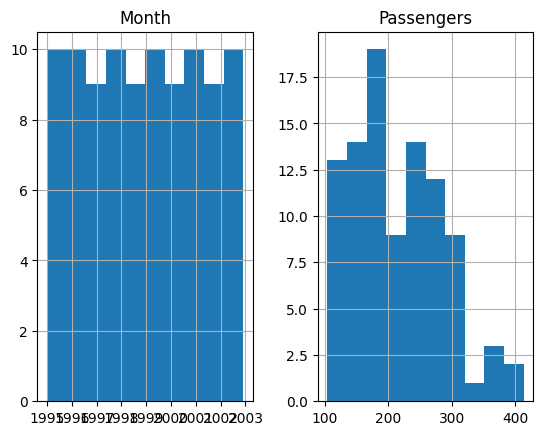

In [10]:
data.hist()

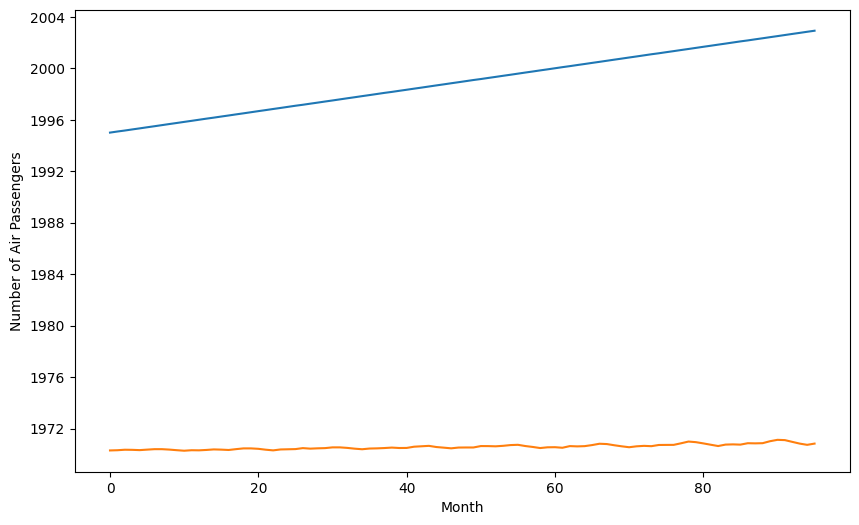

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [12]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [13]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


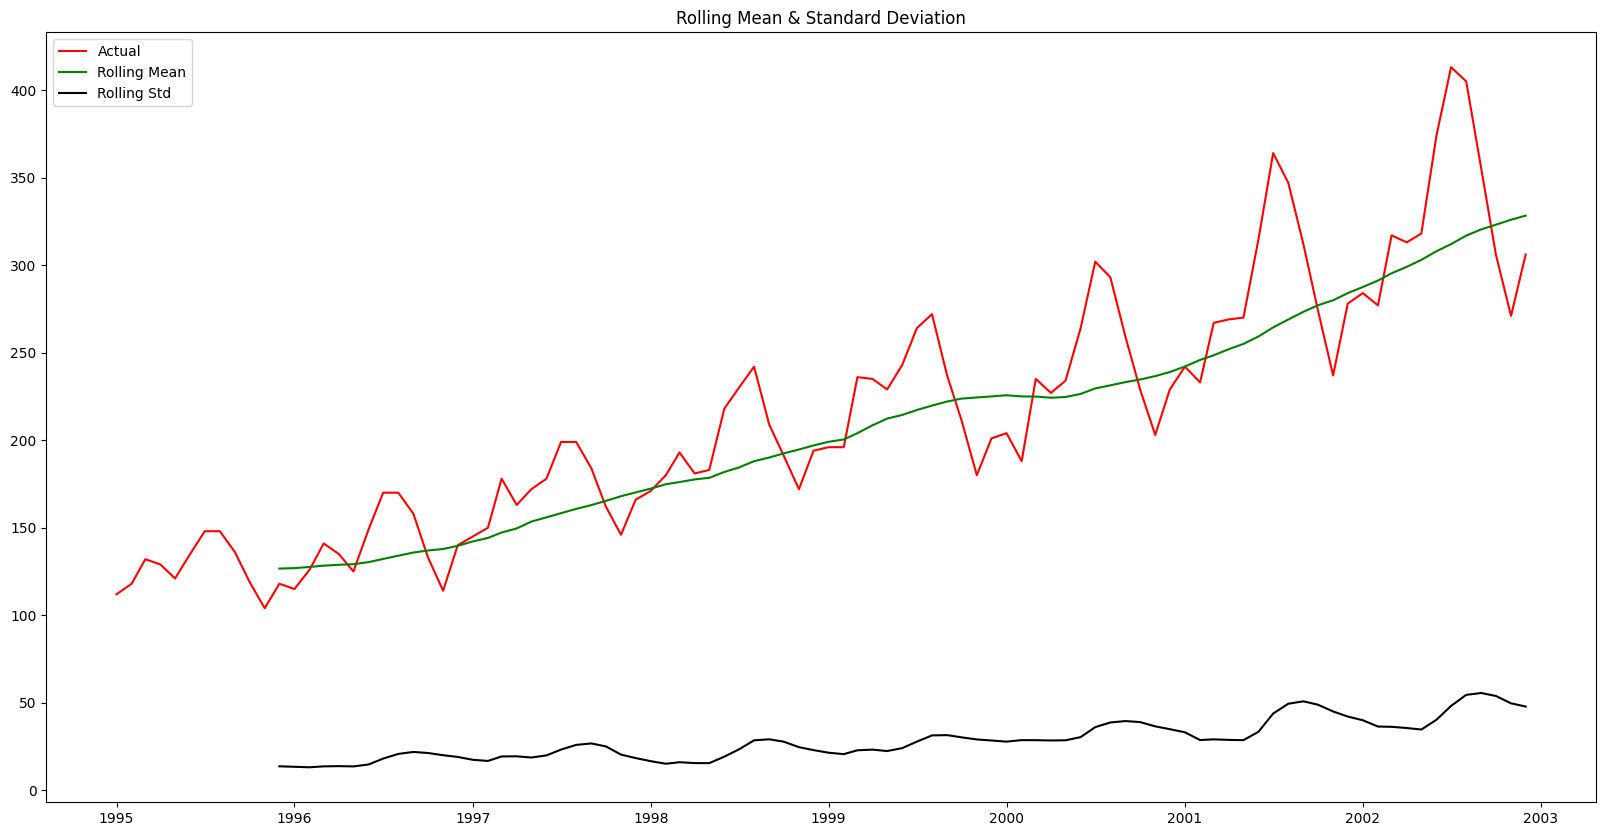

In [14]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Dickey-Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


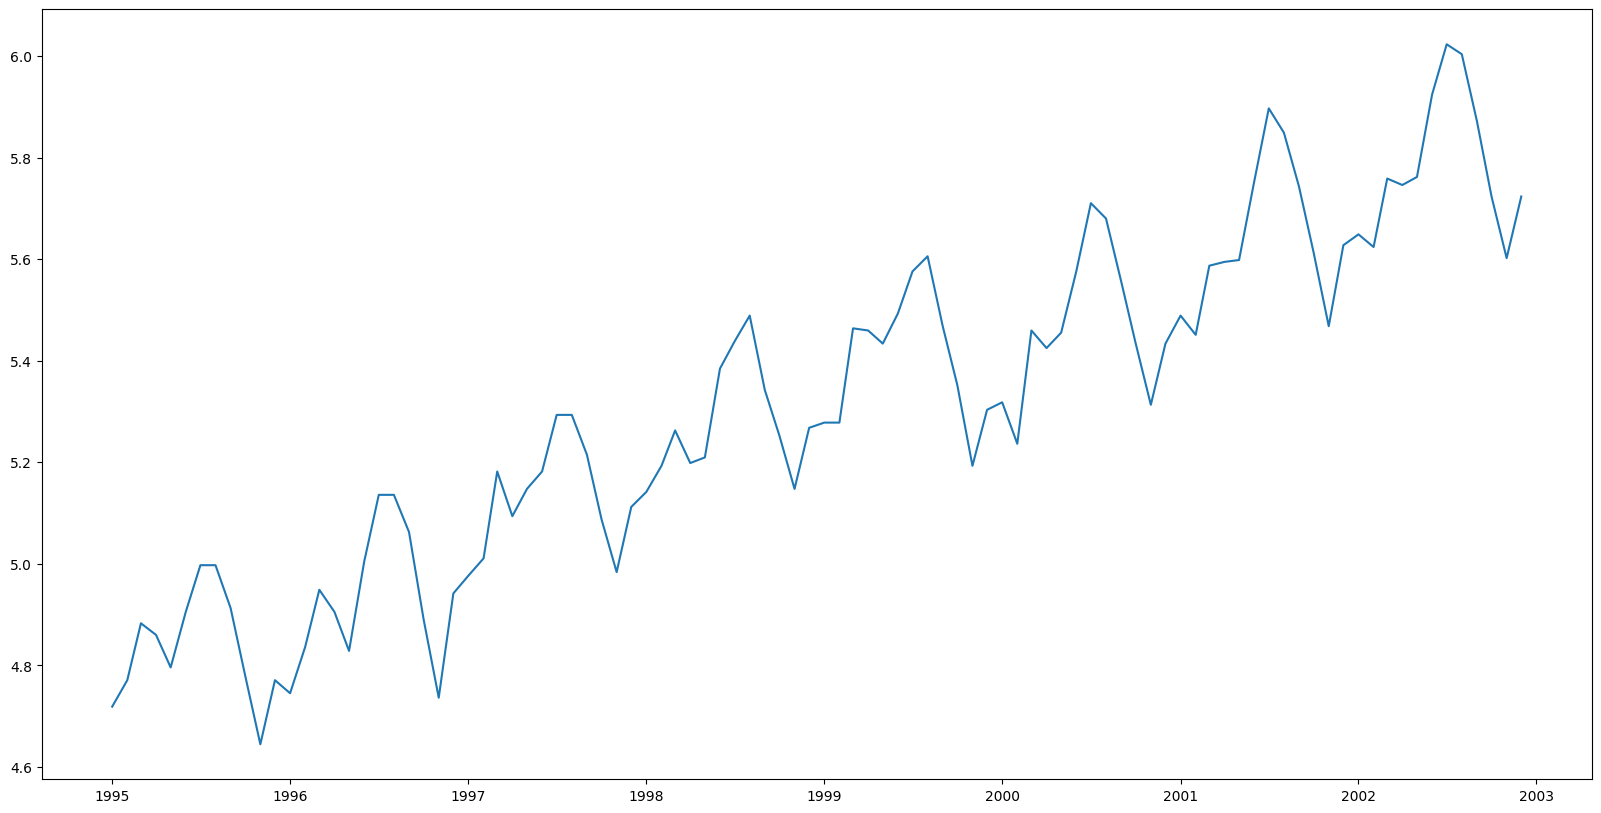

In [16]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

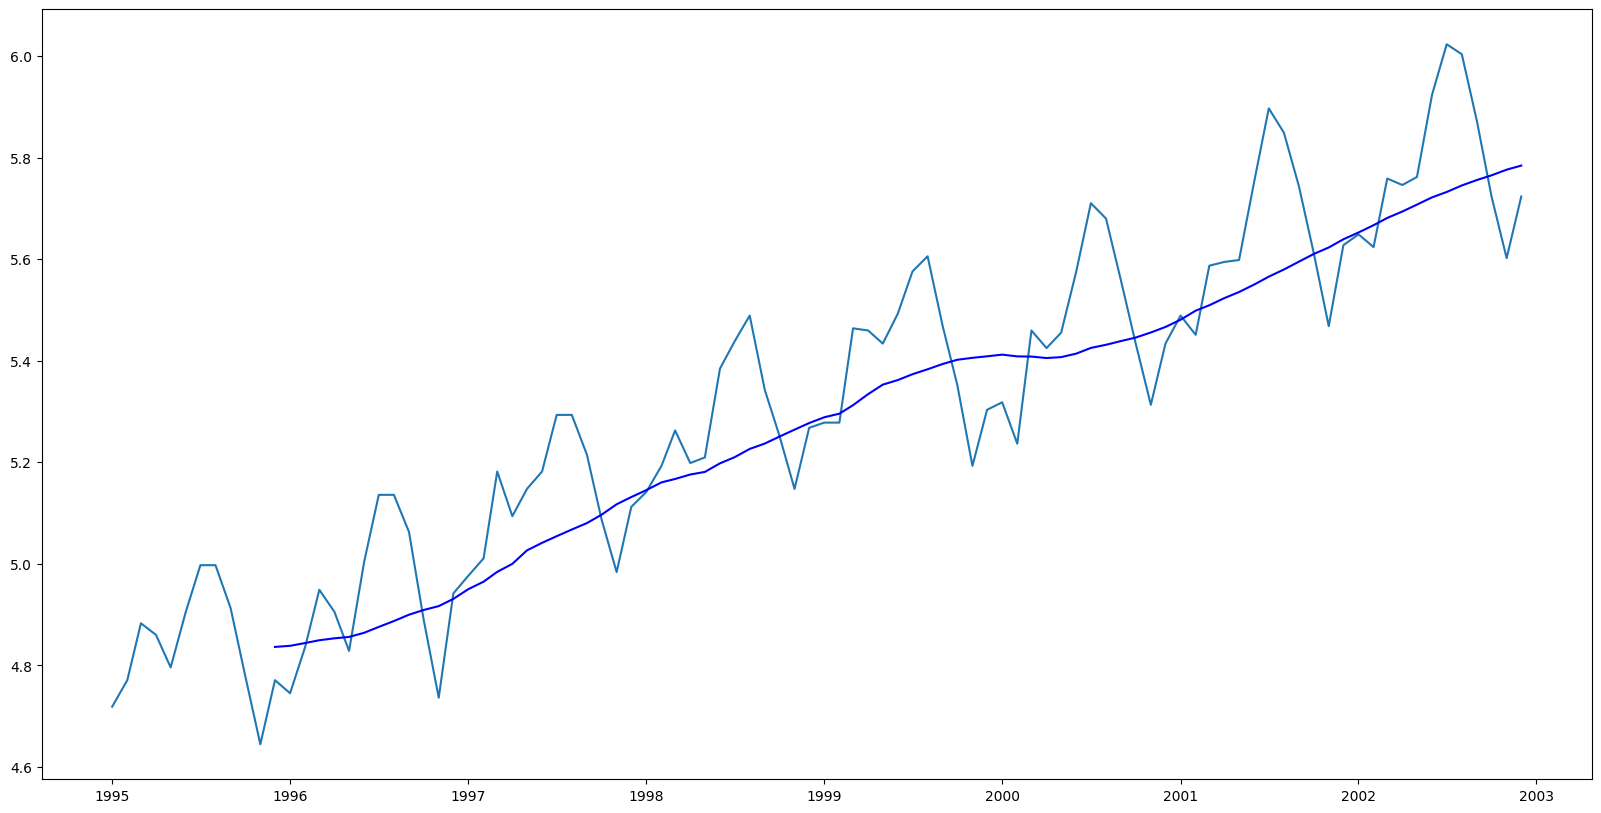

In [17]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [18]:
data_log_diff=data_log-MAvg
data_log_diff.head(15)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [19]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [20]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

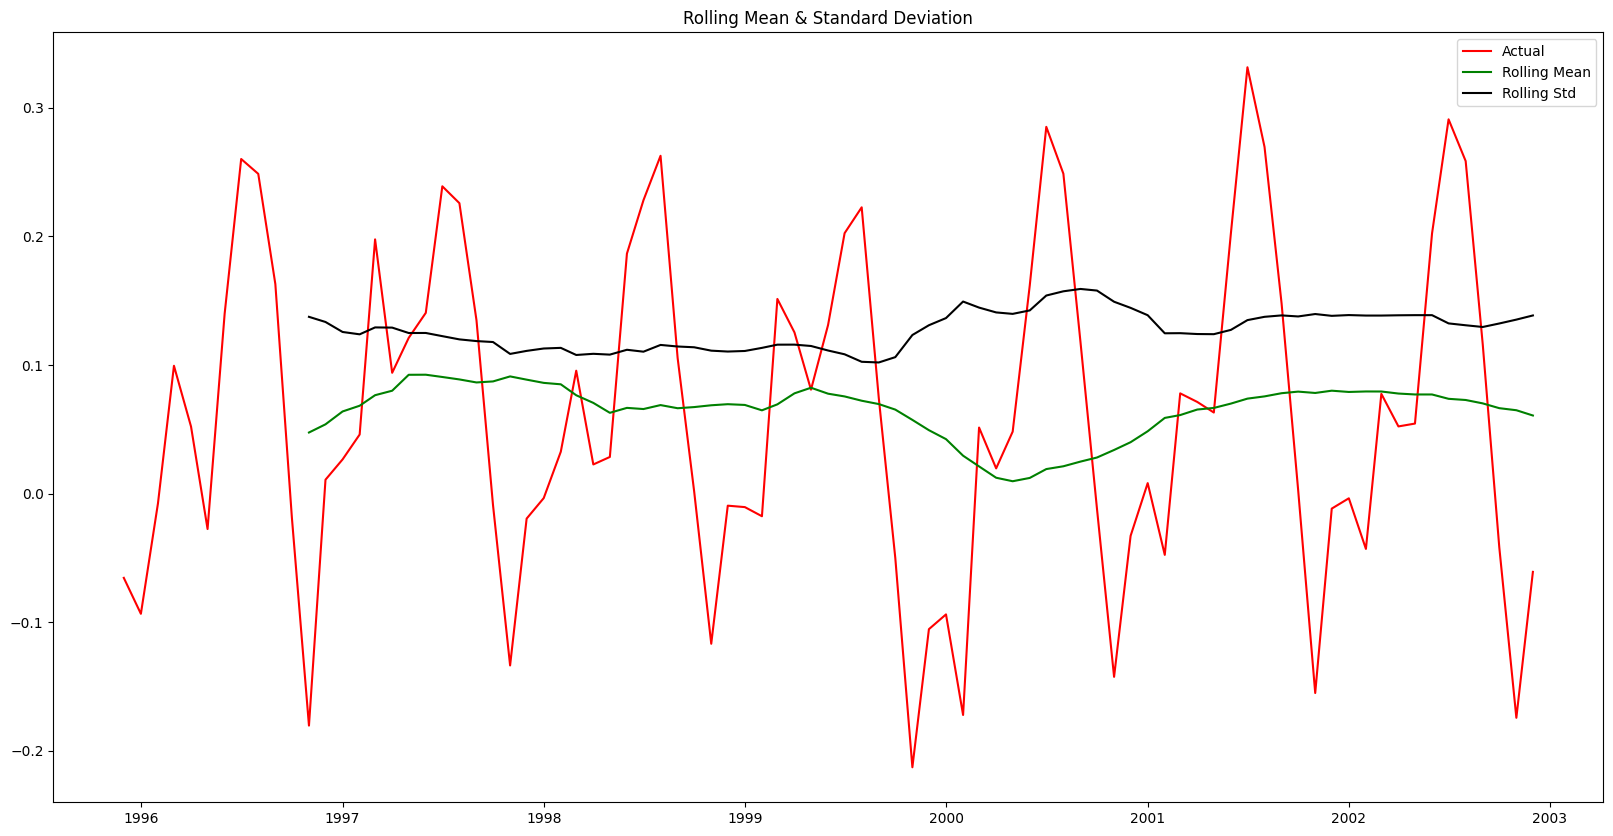

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [21]:
stationarity(data_log_diff)

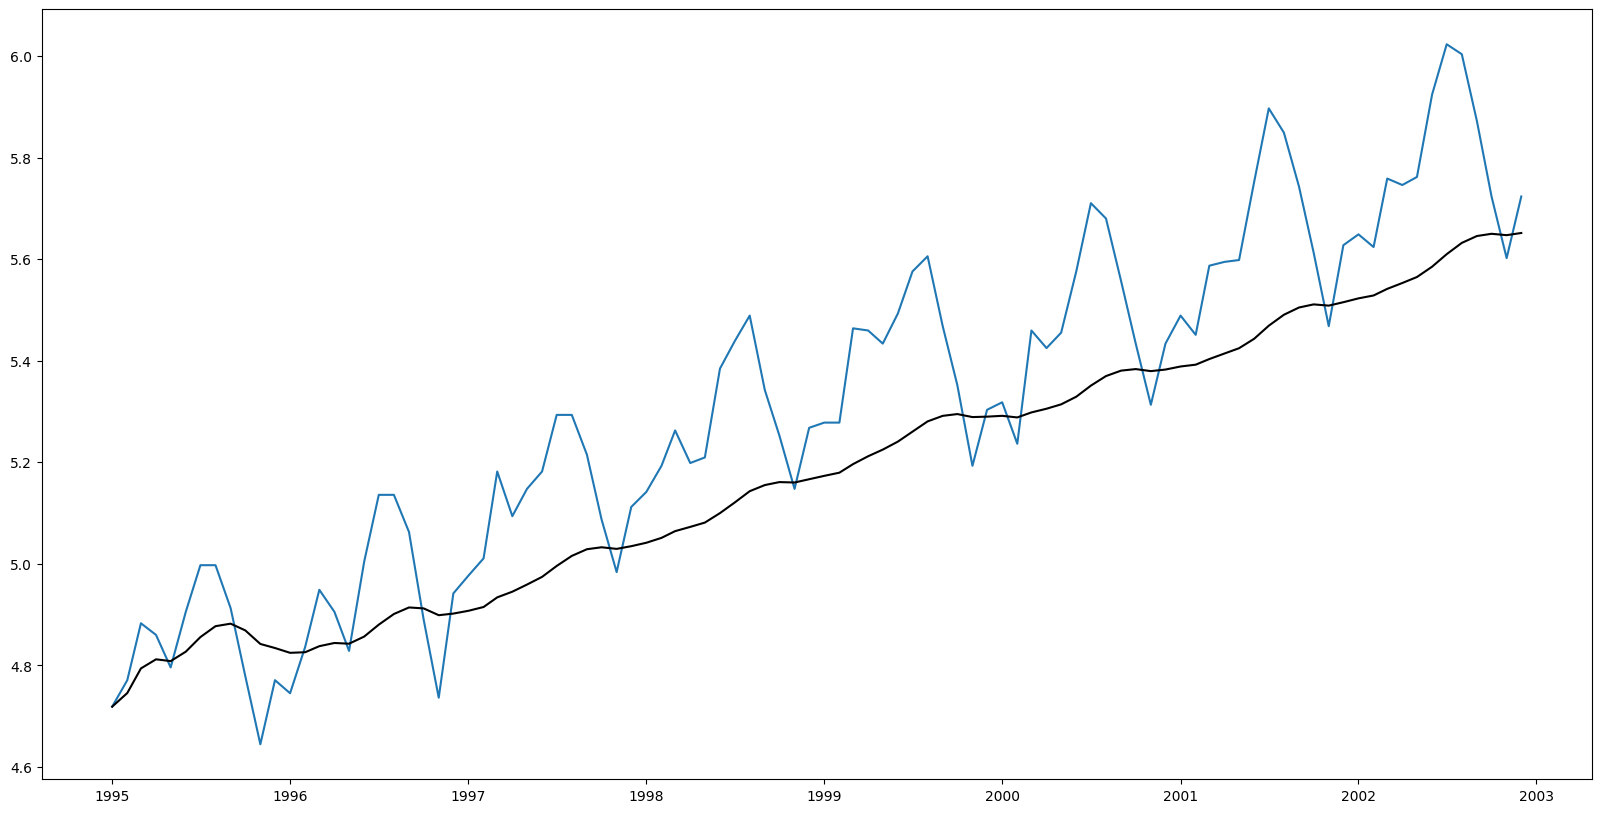

In [22]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black') 


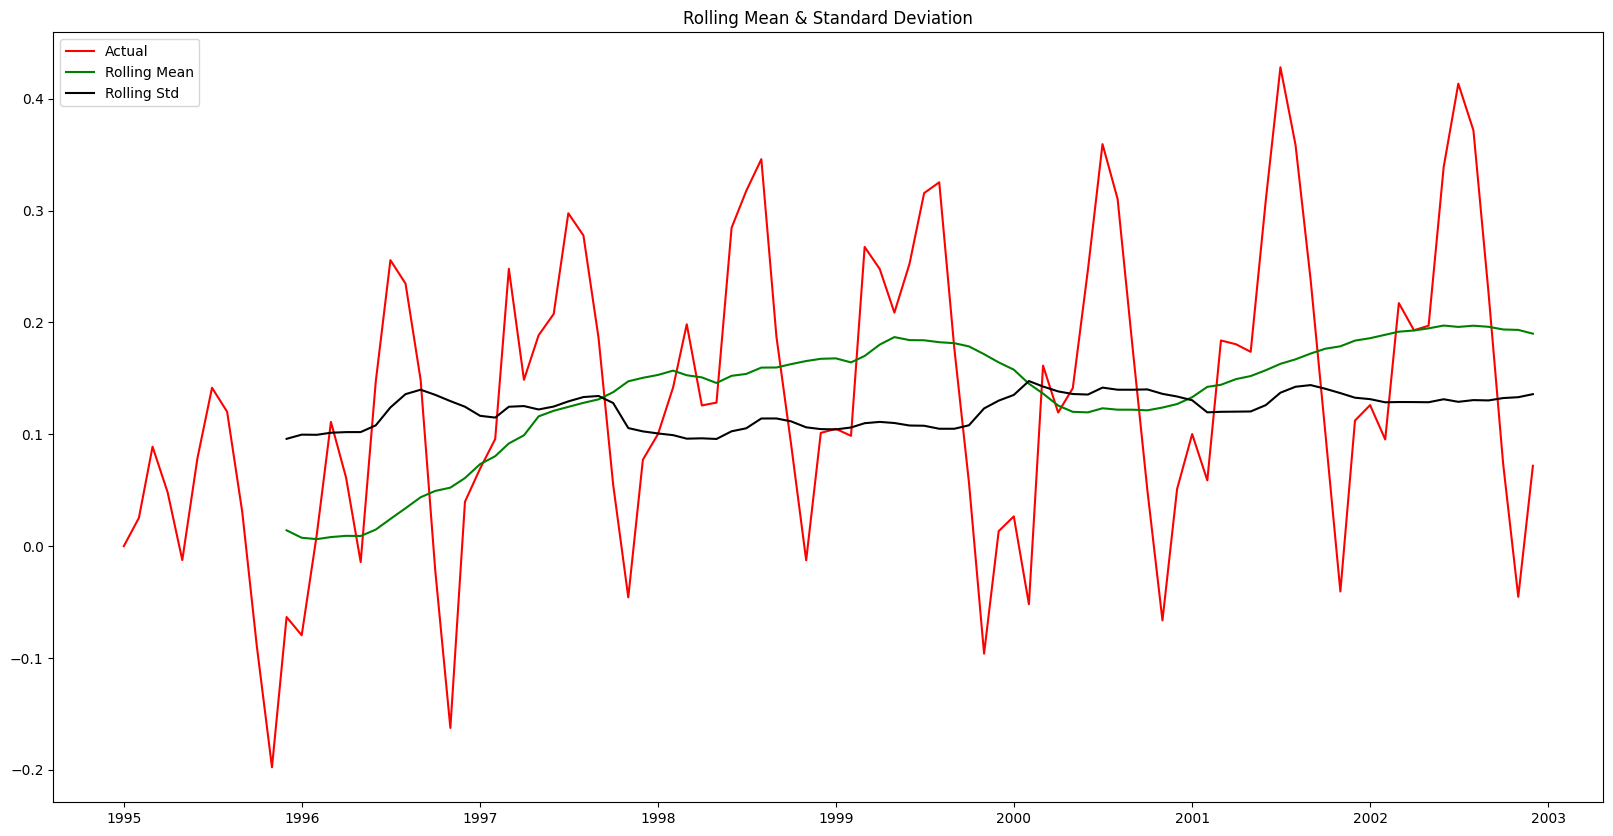

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [23]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

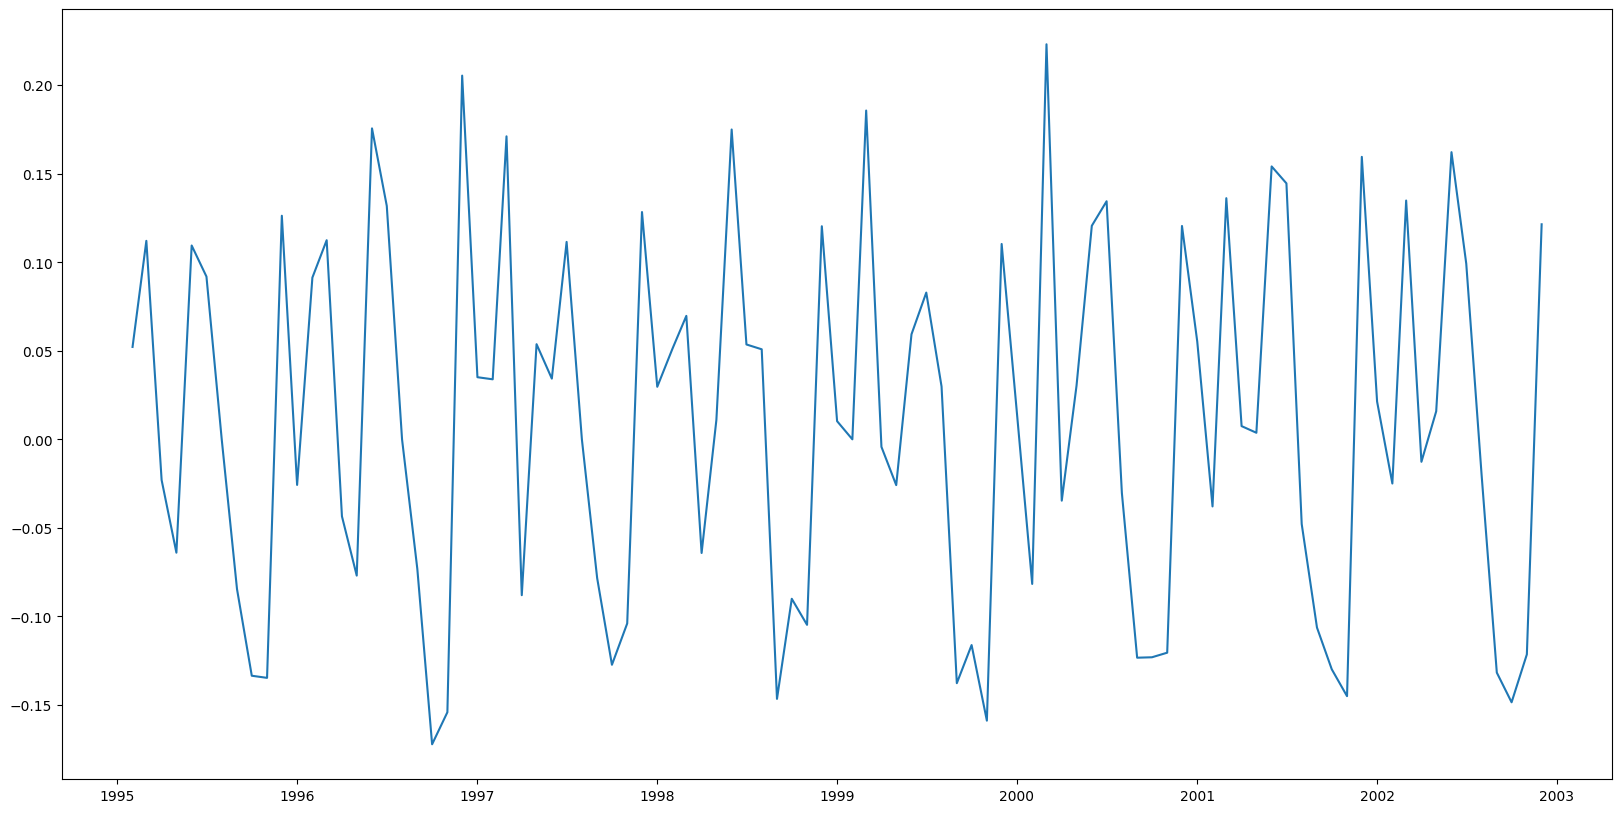

In [24]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

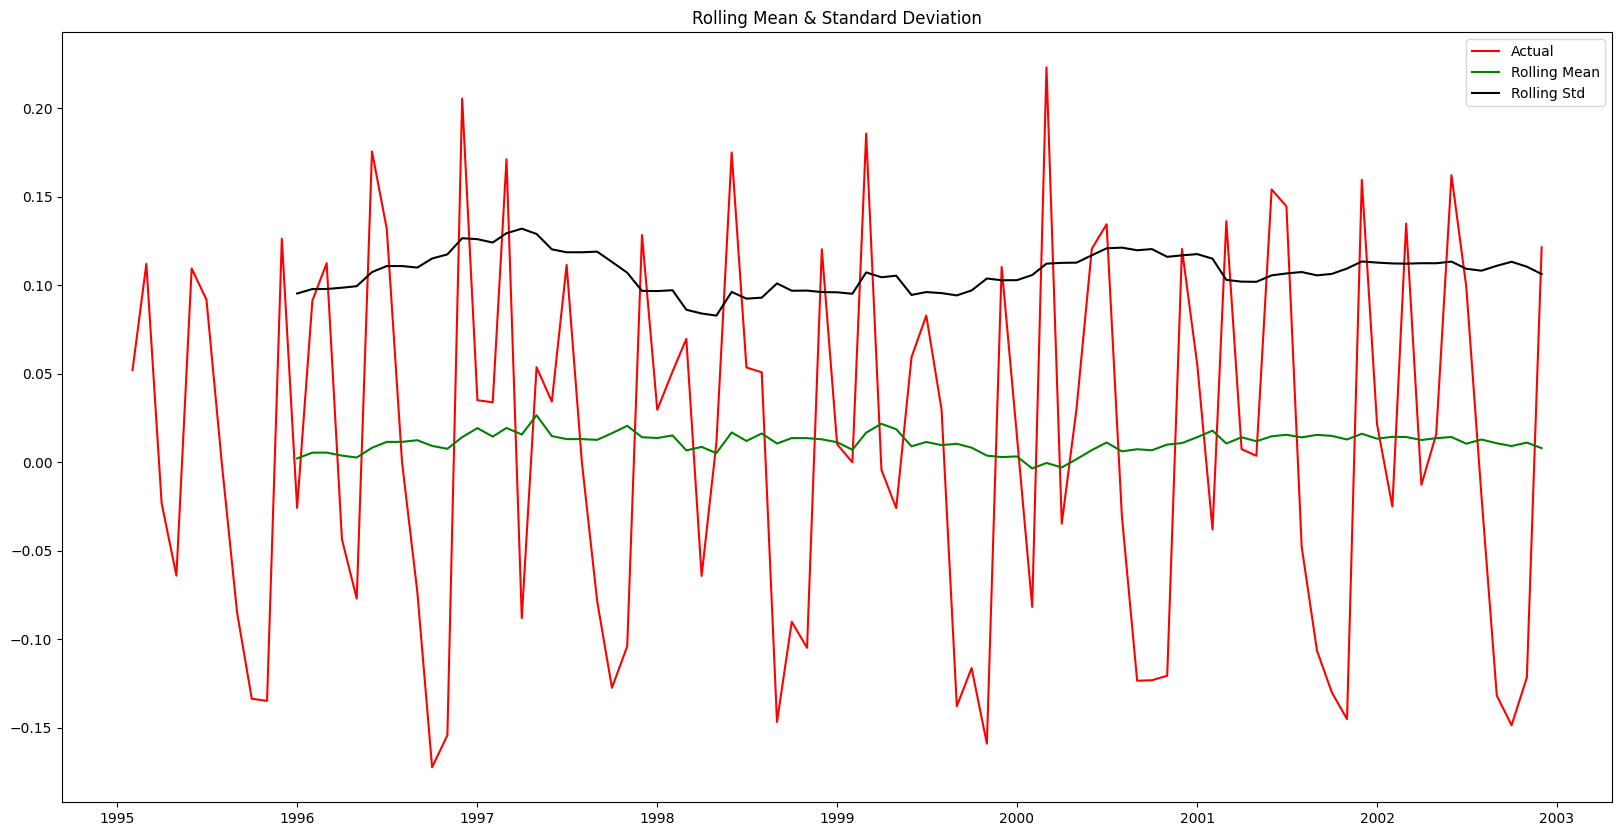

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [25]:
data_shift=data_shift.dropna()
stationarity(data_shift)

#### Making seasonal_decompose graph from statsmodels.tsa.seasonal library And Analysis the Trend, Seasonal And Residuals in dataset

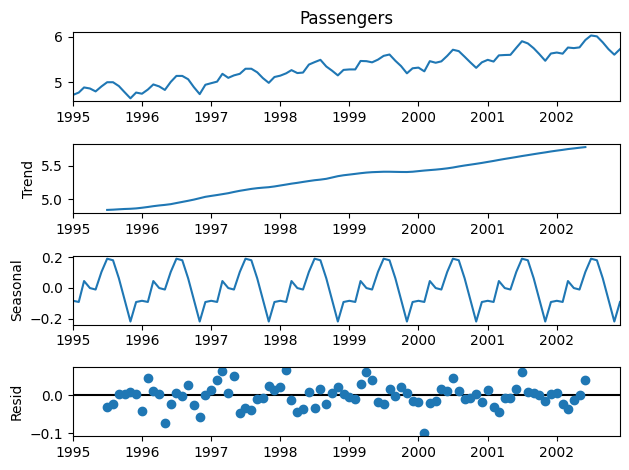

'\n# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.\n# tsa = Time Series analysis  \n# seasonal_decompose = Seasonal decomposition using moving averages.'

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose   

ts_add = seasonal_decompose(data_log['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()  # Graph of normal data without applying stationary process.

'''
# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.
# tsa = Time Series analysis  
# seasonal_decompose = Seasonal decomposition using moving averages.'''

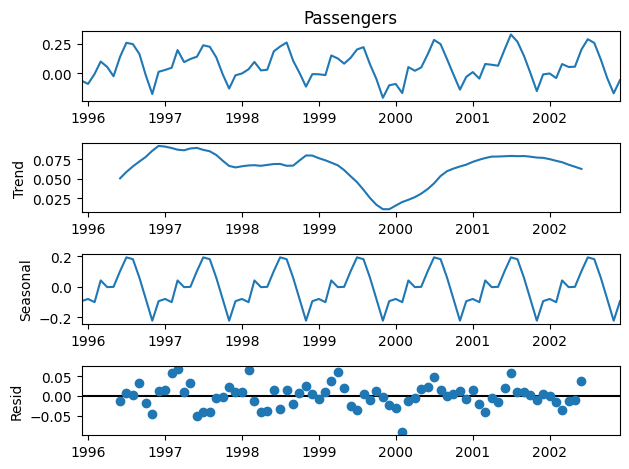

In [27]:
ts_add1 = seasonal_decompose(data_log_diff['Passengers'],model="additive")
fig = ts_add1.plot()
plt.show()  # Graph of Applying Log on original data.

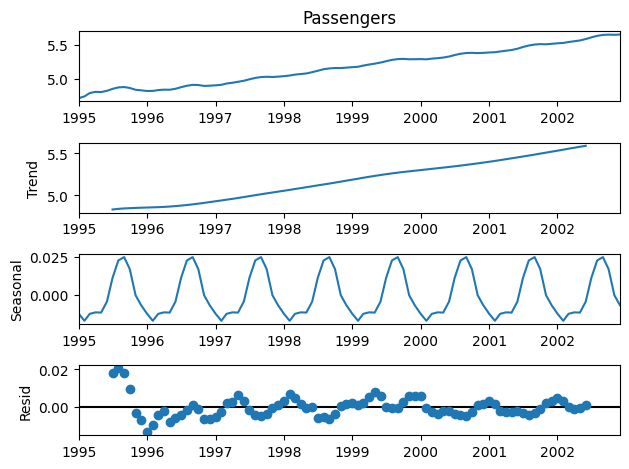

In [28]:
ts_add1 = seasonal_decompose(exp_data['Passengers'],model="additive")
fig = ts_add1.plot()
plt.show() # Graph of Applying # ewm = Provide exponentially weighted (EW) calculations Log data.

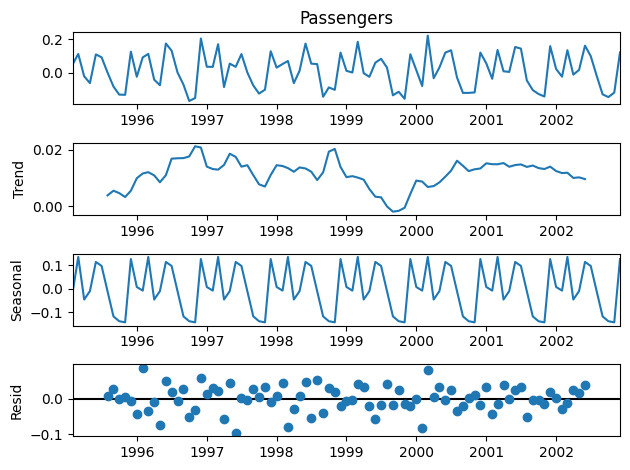

In [29]:
ts_add1 = seasonal_decompose(data_shift['Passengers'],model="additive")
fig = ts_add1.plot()
plt.show()  # Graph of applying shift function

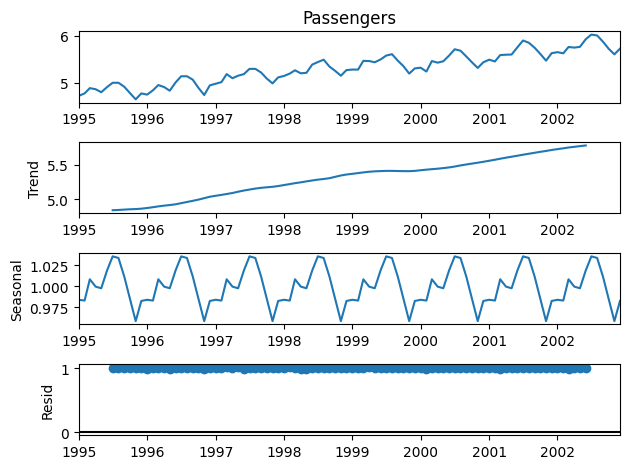

In [30]:
ts_add = seasonal_decompose(data_log['Passengers'],model="multiadditive")
fig = ts_add.plot()
plt.show()

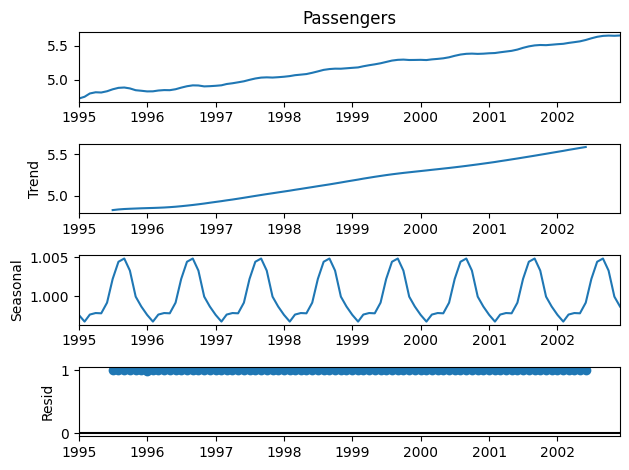

In [31]:
ts_add1 = seasonal_decompose(exp_data['Passengers'],model="multiadditive")
fig = ts_add1.plot()
plt.show() # Graph of Applying # ewm = Provide exponentially weighted (EW) calculations Log data.

### Ploting tsa plot

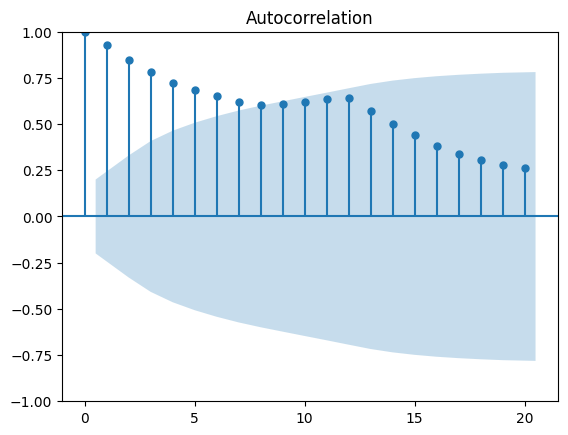

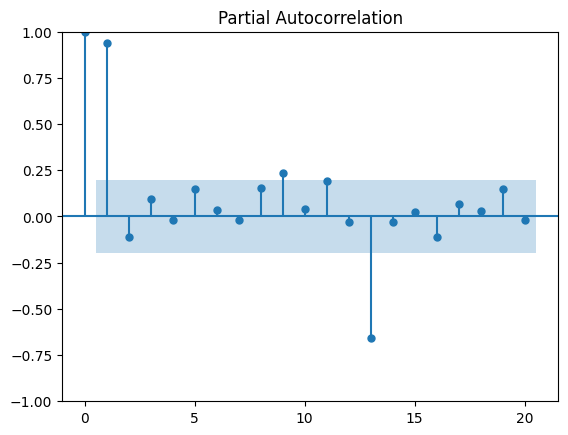

In [32]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_log['Passengers'])
tsa_plots.plot_pacf(data_log['Passengers'])
plt.show()

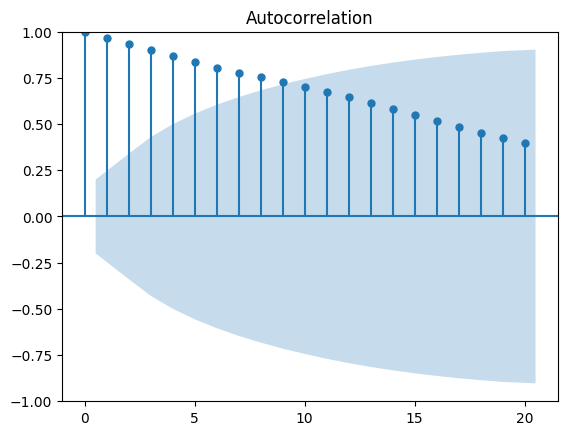

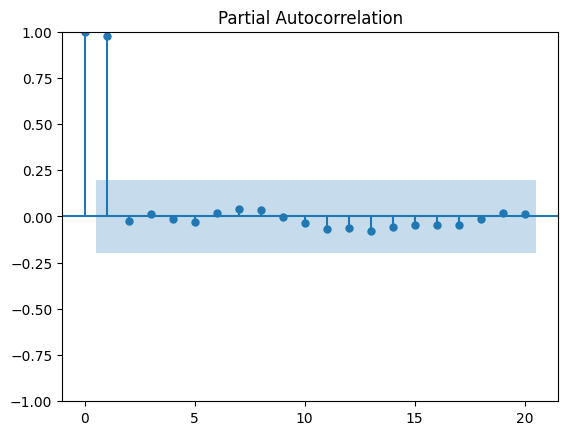

In [33]:
tsa_plots.plot_acf(exp_data['Passengers'])
tsa_plots.plot_pacf(exp_data['Passengers'])
plt.show()  # Graph of Applying ewm = Provide exponentially weighted (EW) calculations Log data.

### separate out a validation dataset

In [34]:
splitA=len(data_shift) - 15    # Substract few rows from original data

dataset, validation = data_shift[0:splitA], data_shift[splitA:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 80, Validation 15


In [35]:
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv', header=False)

### Persistence(Base) model

In [36]:
# evaluate a persistence model
# load data
# make new dataframe by use of dataset.csv (splited in above cell)
train = pd.read_csv('dataset.csv',header=None, index_col=0, squeeze=True) #parse_dates=True,
train

0
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
1995-06-01    0.109484
                ...   
2001-05-01    0.003711
2001-06-01    0.154151
2001-07-01    0.144581
2001-08-01   -0.047829
2001-09-01   -0.106322
Name: 1, Length: 80, dtype: float64

In [37]:
# prepare data
X = train.values # int64
X

array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259,
        0.12629373, -0.0257525 ,  0.09134978,  0.11247798, -0.04348511,
       -0.07696104,  0.17563257,  0.13185213,  0.        , -0.0732034 ,
       -0.1722459 , -0.15415068,  0.20544397,  0.03509132,  0.03390155,
        0.17114826, -0.08803335,  0.05374428,  0.03428907,  0.11152127,
        0.        , -0.07836907, -0.12733942, -0.10398971,  0.12838117,
        0.02967577,  0.05129329,  0.06973334, -0.06419316,  0.01098912,
        0.17500891,  0.05358425,  0.05085842, -0.14660347, -0.09006082,
       -0.10477895,  0.12036368,  0.0102565 ,  0.        ,  0.18571715,
       -0.00424629, -0.02586351,  0.05933944,  0.08288766,  0.02985296,
       -0.13774193, -0.11620201, -0.15890128,  0.11034806,  0.01481509,
       -0.08167803,  0.22314355, -0.0346355 ,  0.0303711 ,  0.12062799,
        0.13447791, -0.03025441, -0.12334455, -0.12310606, -0.12

In [38]:
X = X.astype('float32')
X

array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259,
        0.12629372, -0.0257525 ,  0.09134978,  0.11247798, -0.04348511,
       -0.07696104,  0.17563257,  0.13185214,  0.        , -0.07320341,
       -0.1722459 , -0.15415068,  0.20544398,  0.03509132,  0.03390155,
        0.17114826, -0.08803335,  0.05374428,  0.03428907,  0.11152127,
        0.        , -0.07836907, -0.12733942, -0.10398971,  0.12838116,
        0.02967577,  0.05129329,  0.06973334, -0.06419316,  0.01098912,
        0.17500891,  0.05358425,  0.05085842, -0.14660348, -0.09006082,
       -0.10477895,  0.12036368,  0.0102565 ,  0.        ,  0.18571715,
       -0.00424629, -0.02586351,  0.05933944,  0.08288766,  0.02985296,
       -0.13774192, -0.116202  , -0.15890129,  0.11034806,  0.01481509,
       -0.08167803,  0.22314355, -0.0346355 ,  0.0303711 ,  0.12062798,
        0.13447791, -0.03025441, -0.12334455, -0.12310605, -0.12

In [39]:
train_size = int(len(X) * 0.75)  # take 50% data for training 
train_size

60

In [40]:
train, test=X[0:train_size], X[train_size:]

In [41]:
train

array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259,
        0.12629372, -0.0257525 ,  0.09134978,  0.11247798, -0.04348511,
       -0.07696104,  0.17563257,  0.13185214,  0.        , -0.07320341,
       -0.1722459 , -0.15415068,  0.20544398,  0.03509132,  0.03390155,
        0.17114826, -0.08803335,  0.05374428,  0.03428907,  0.11152127,
        0.        , -0.07836907, -0.12733942, -0.10398971,  0.12838116,
        0.02967577,  0.05129329,  0.06973334, -0.06419316,  0.01098912,
        0.17500891,  0.05358425,  0.05085842, -0.14660348, -0.09006082,
       -0.10477895,  0.12036368,  0.0102565 ,  0.        ,  0.18571715,
       -0.00424629, -0.02586351,  0.05933944,  0.08288766,  0.02985296,
       -0.13774192, -0.116202  , -0.15890129,  0.11034806,  0.01481509],
      dtype=float32)

In [42]:
test

array([-0.08167803,  0.22314355, -0.0346355 ,  0.0303711 ,  0.12062798,
        0.13447791, -0.03025441, -0.12334455, -0.12310605, -0.12051602,
        0.12051602,  0.05521572, -0.03789927,  0.1362102 ,  0.00746272,
        0.00371058,  0.15415068,  0.14458123, -0.04782909, -0.1063216 ],
      dtype=float32)

#### walk-forward validation

In [43]:
history = [x for x in train]
history

[0.05218575,
 0.1121173,
 -0.022989519,
 -0.064021856,
 0.10948423,
 0.0919375,
 0.0,
 -0.08455739,
 -0.13353139,
 -0.13473259,
 0.12629372,
 -0.025752496,
 0.09134978,
 0.11247798,
 -0.043485112,
 -0.07696104,
 0.17563257,
 0.13185214,
 0.0,
 -0.07320341,
 -0.1722459,
 -0.15415068,
 0.20544398,
 0.03509132,
 0.03390155,
 0.17114826,
 -0.08803335,
 0.053744275,
 0.034289073,
 0.111521274,
 0.0,
 -0.078369066,
 -0.12733942,
 -0.10398971,
 0.12838116,
 0.029675769,
 0.051293295,
 0.06973334,
 -0.06419316,
 0.010989121,
 0.17500891,
 0.053584248,
 0.050858416,
 -0.14660348,
 -0.09006082,
 -0.10477895,
 0.12036368,
 0.0102565,
 0.0,
 0.18571715,
 -0.004246291,
 -0.025863511,
 0.05933944,
 0.08288766,
 0.029852964,
 -0.13774192,
 -0.116202004,
 -0.15890129,
 0.11034806,
 0.014815086]

In [44]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('Predicted=%.3f, Expected=%.3f' % (yhat, obs)) # obs=observation

Predicted=0.015, Expected=-0.082
Predicted=-0.082, Expected=0.223
Predicted=0.223, Expected=-0.035
Predicted=-0.035, Expected=0.030
Predicted=0.030, Expected=0.121
Predicted=0.121, Expected=0.134
Predicted=0.134, Expected=-0.030
Predicted=-0.030, Expected=-0.123
Predicted=-0.123, Expected=-0.123
Predicted=-0.123, Expected=-0.121
Predicted=-0.121, Expected=0.121
Predicted=0.121, Expected=0.055
Predicted=0.055, Expected=-0.038
Predicted=-0.038, Expected=0.136
Predicted=0.136, Expected=0.007
Predicted=0.007, Expected=0.004
Predicted=0.004, Expected=0.154
Predicted=0.154, Expected=0.145
Predicted=0.145, Expected=-0.048
Predicted=-0.048, Expected=-0.106


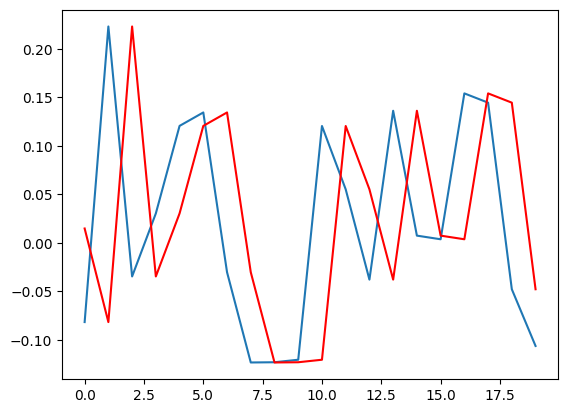

In [45]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [46]:
from math import sqrt
from sklearn.metrics import mean_squared_error


rmse = sqrt(mean_squared_error(test, predictions))  # report performance
print('RMSE: %.3f' % rmse)

RMSE: 0.141


In [47]:
mean = np.mean(test, ) # predictions, # _squared_error
print('mean: %.3f' % mean) 

mean: 0.021


In [48]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
     # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
        
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [49]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [50]:
import itertools
L1 = [1,2,3,4,5]
L2 = ['A','B','C']
L3 = [9,8,7]

for x,y,z in itertools.product(L1,L2,L3):
    print(x,y,z)

1 A 9
1 A 8
1 A 7
1 B 9
1 B 8
1 B 7
1 C 9
1 C 8
1 C 7
2 A 9
2 A 8
2 A 7
2 B 9
2 B 8
2 B 7
2 C 9
2 C 8
2 C 7
3 A 9
3 A 8
3 A 7
3 B 9
3 B 8
3 B 7
3 C 9
3 C 8
3 C 7
4 A 9
4 A 8
4 A 7
4 B 9
4 B 8
4 B 7
4 C 9
4 C 8
4 C 7
5 A 9
5 A 8
5 A 7
5 B 9
5 B 8
5 B 7
5 C 9
5 C 8
5 C 7


In [51]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
1995-06-01    0.109484
                ...   
2001-05-01    0.003711
2001-06-01    0.154151
2001-07-01    0.144581
2001-08-01   -0.047829
2001-09-01   -0.106322
Name: 1, Length: 80, dtype: float64

In [52]:
# evaluate parameters

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
evaluate_models(train.values,p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.109
ARIMA(0, 0, 1) RMSE=0.108
ARIMA(0, 0, 2) RMSE=0.114
ARIMA(0, 0, 3) RMSE=0.104
ARIMA(0, 0, 4) RMSE=0.097
ARIMA(0, 1, 0) RMSE=0.142
ARIMA(0, 1, 1) RMSE=0.109
ARIMA(0, 1, 2) RMSE=0.108
ARIMA(0, 1, 3) RMSE=0.116
ARIMA(0, 1, 4) RMSE=0.109
ARIMA(0, 2, 0) RMSE=0.236
ARIMA(0, 2, 1) RMSE=0.143
ARIMA(0, 2, 2) RMSE=0.111
ARIMA(0, 2, 3) RMSE=0.110
ARIMA(0, 2, 4) RMSE=0.111
ARIMA(0, 3, 0) RMSE=0.417
ARIMA(0, 3, 1) RMSE=0.238
ARIMA(0, 3, 2) RMSE=0.146
ARIMA(0, 3, 3) RMSE=0.115
ARIMA(0, 3, 4) RMSE=0.112
ARIMA(0, 4, 0) RMSE=0.751
ARIMA(0, 4, 1) RMSE=0.420
ARIMA(0, 4, 2) RMSE=0.242
ARIMA(0, 4, 3) RMSE=0.150
ARIMA(0, 4, 4) RMSE=0.115
ARIMA(1, 0, 0) RMSE=0.109
ARIMA(1, 0, 1) RMSE=0.105
ARIMA(1, 0, 2) RMSE=0.101
ARIMA(1, 0, 3) RMSE=0.102
ARIMA(1, 0, 4) RMSE=0.101
ARIMA(1, 1, 0) RMSE=0.133
ARIMA(1, 1, 1) RMSE=0.109
ARIMA(1, 1, 2) RMSE=0.105
ARIMA(1, 1, 3) RMSE=0.110
ARIMA(1, 1, 4) RMSE=0.120
ARIMA(1, 2, 0) RMSE=0.196
ARIMA(1, 2, 1) RMSE=0.135
ARIMA(1, 2, 2) RMSE=0.143
ARIMA(1, 2, 

#### Build Model based on the optimized values

In [92]:
# prepare data
X = train.values
X = X.astype('float32')

In [93]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 15)
forecast

array([-0.01502388, -0.03428751, -0.05734096, -0.04078766, -0.04000497,
       -0.04602771, -0.04370046, -0.04263505, -0.0438936 , -0.04371704,
       -0.04336088, -0.04357504, -0.04360505, -0.04351856, -0.04354554])

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [94]:
#Error on the test data

val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

0.12363025399619153

In [95]:
val = pd.read_csv('validation.csv', header=None)
mse = mean_squared_error(val[1], forecast)
mse

0.015284439703162832

#### Combine train and test data and build final model

In [96]:
model_combine = ARIMA(X, order=(2,1,0))
model_combine_fit = model.fit()

In [97]:
forecast_a=model_combine_fit.forecast(steps=10)
forecast_a

array([-0.01502388, -0.03428751, -0.05734096, -0.04078766, -0.04000497,
       -0.04602771, -0.04370046, -0.04263505, -0.0438936 , -0.04371704])

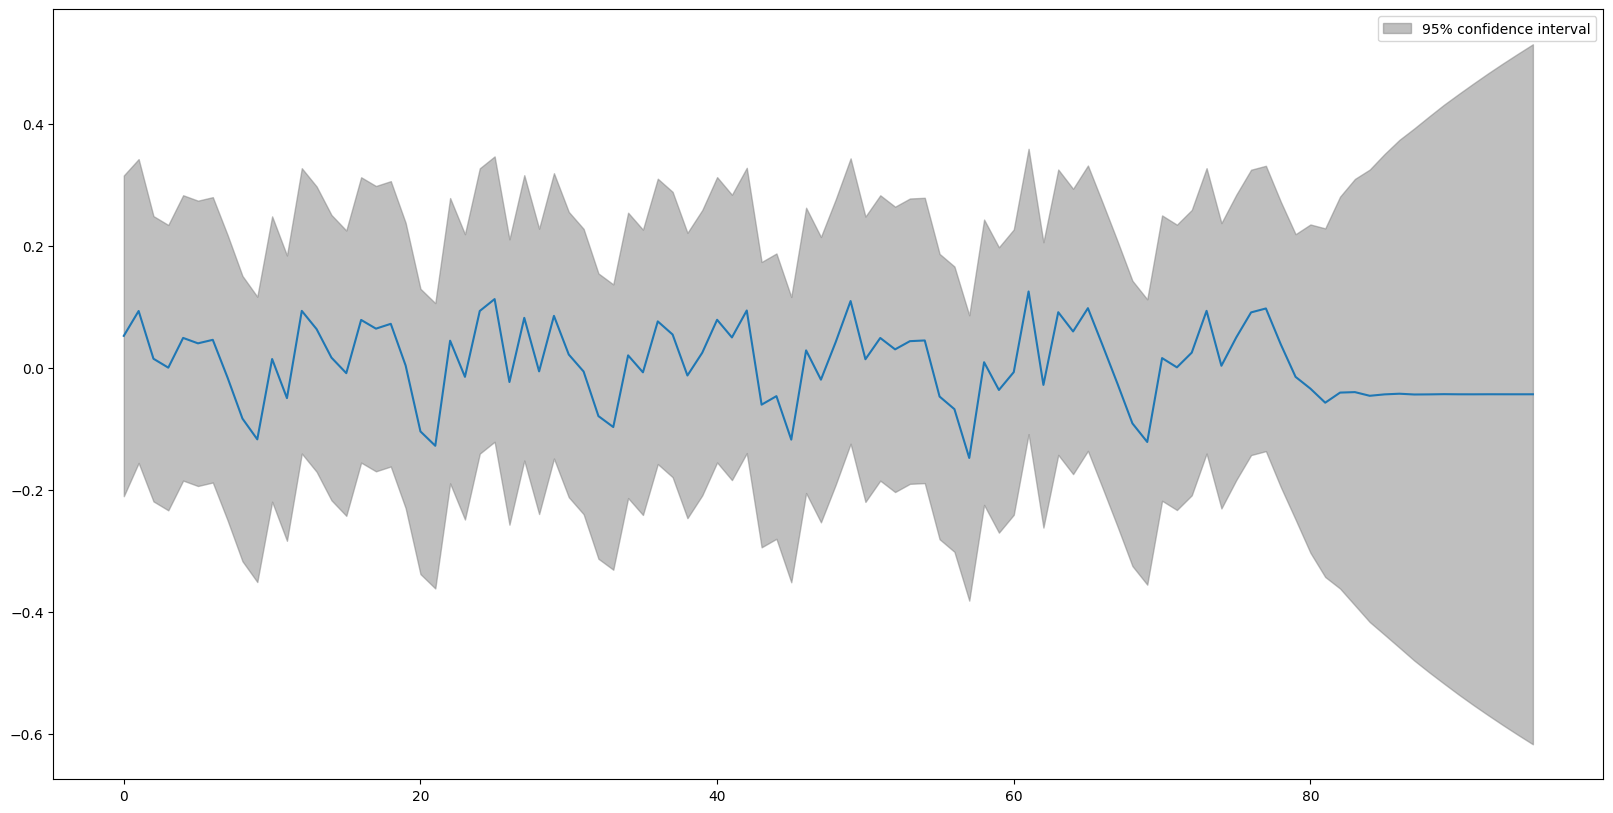

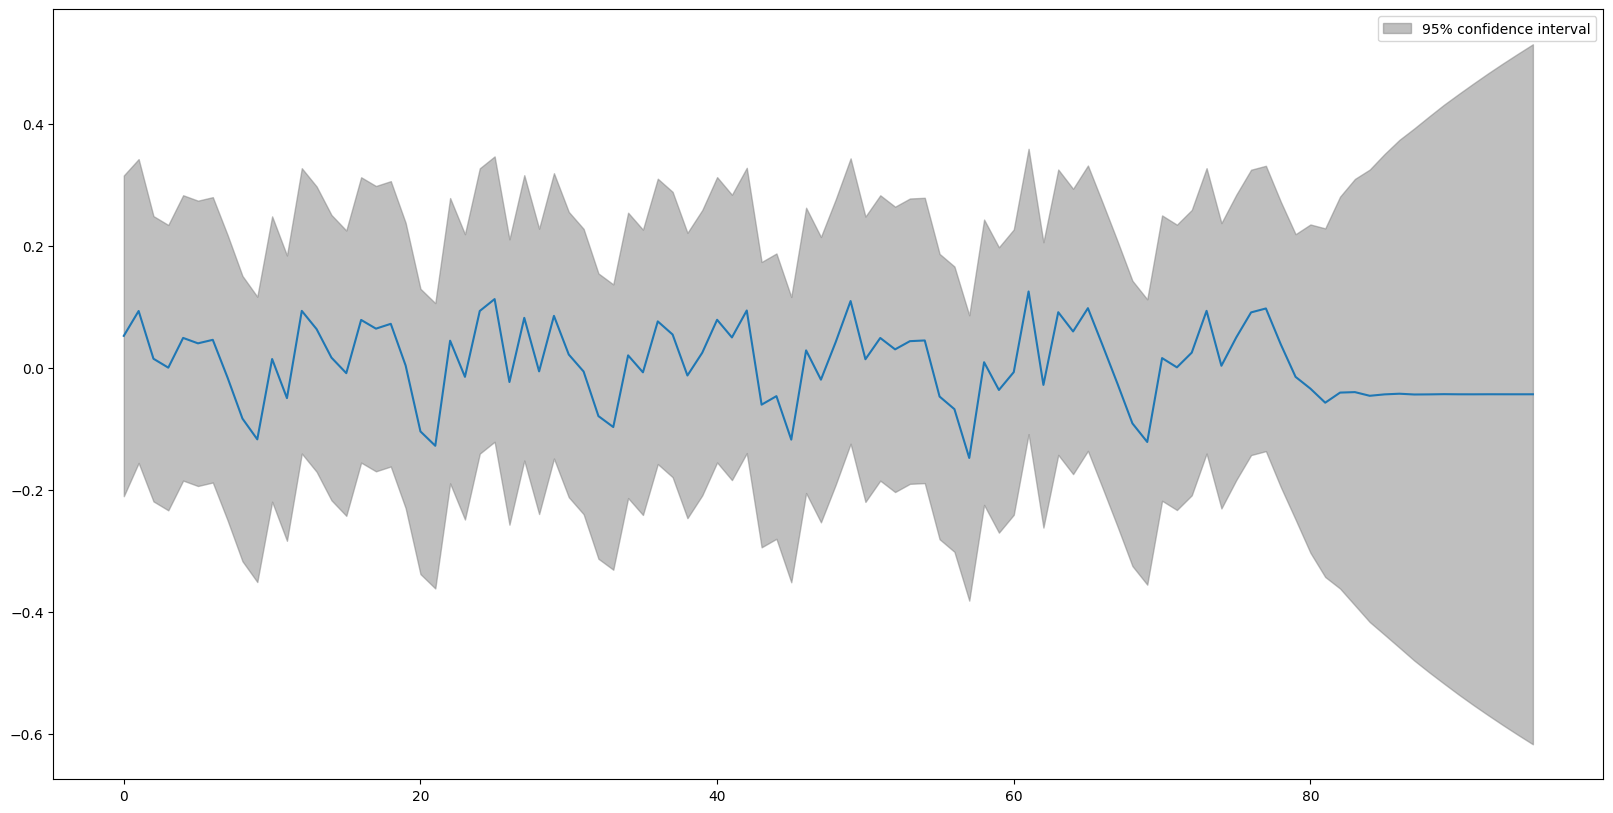

In [98]:
plot_predict(model_combine_fit,1,96) 

# ARIMA Model

plotting ARIMA model


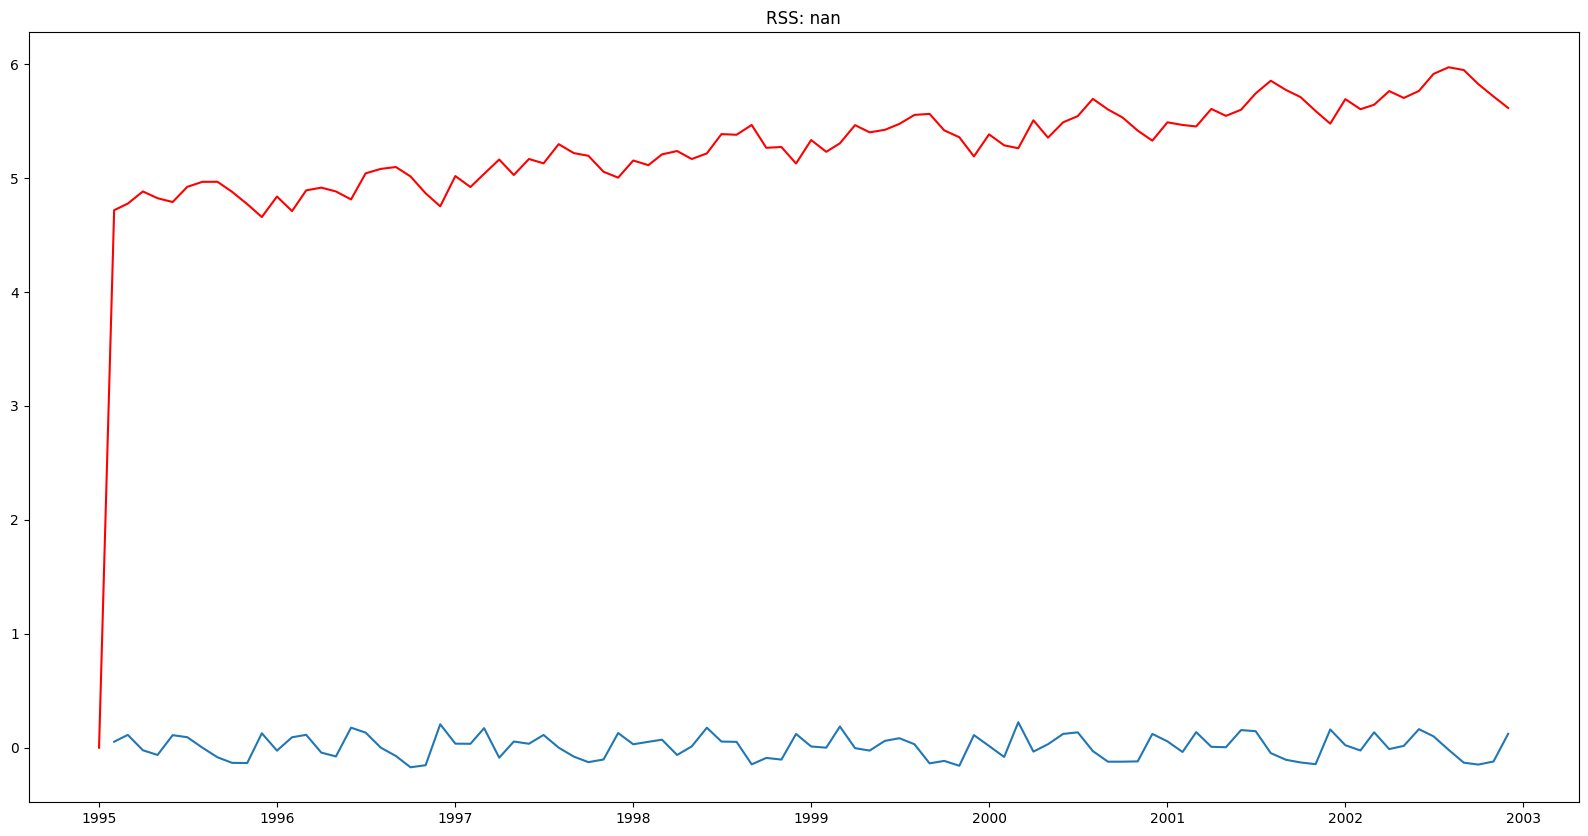

In [99]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [ ]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

In [100]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494791
1995-04-01    14.377703
1995-05-01    19.201309
dtype: float64


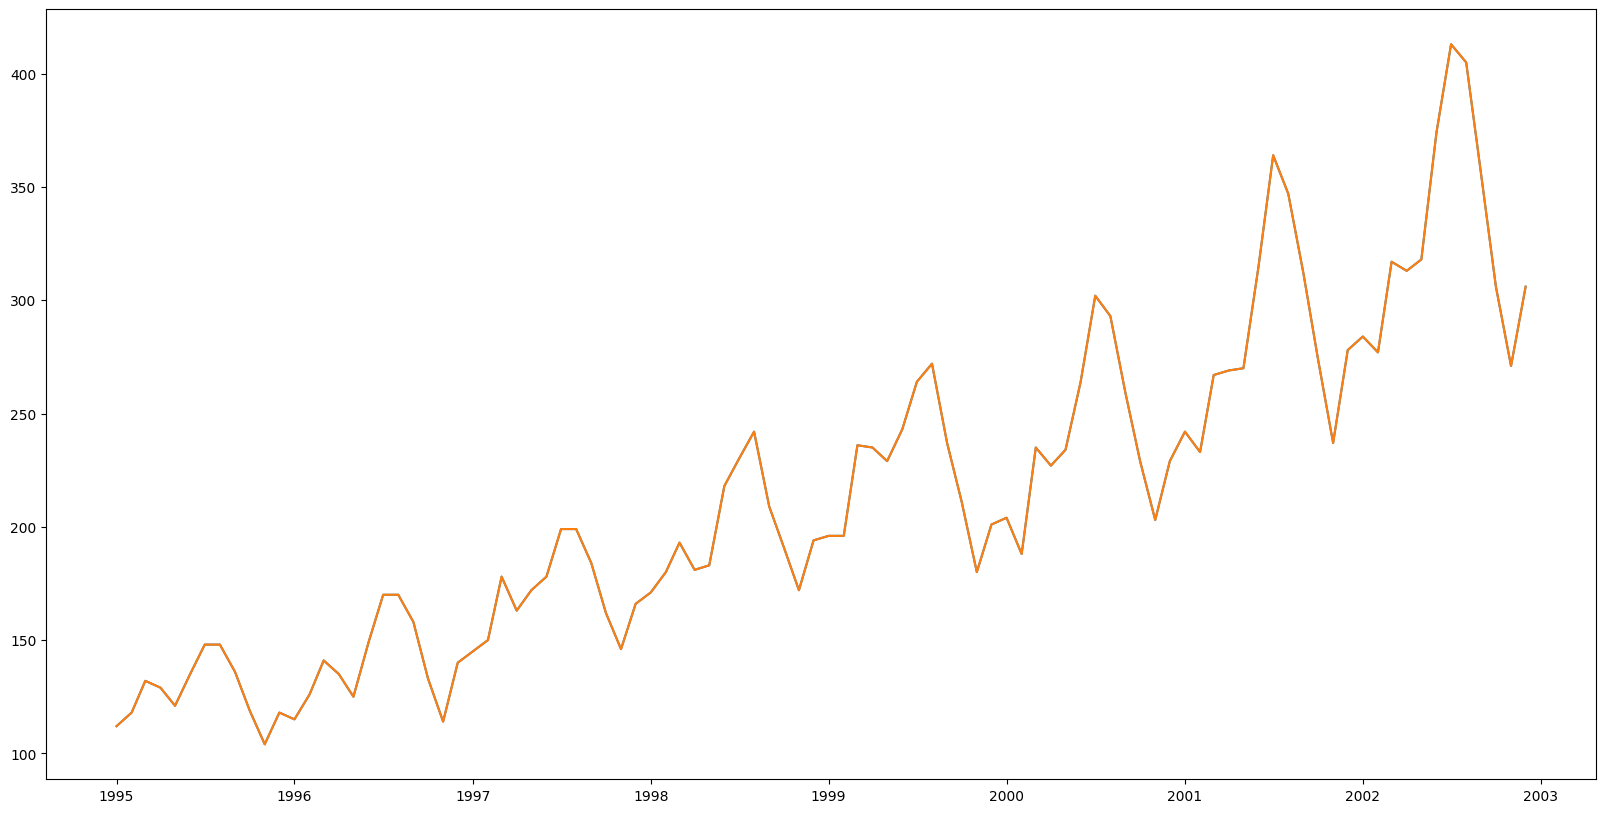

In [101]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [102]:
rcParams['figure.figsize']=20,10
results.predict(1,96)
x=results.forecast(steps=120)

In [103]:
results.forecast(steps=120)

2003-01-01    5.785476
2003-02-01    5.763414
2003-03-01    5.768748
2003-04-01    5.766117
2003-05-01    5.766367
                ...   
2012-08-01    5.765645
2012-09-01    5.765645
2012-10-01    5.765645
2012-11-01    5.765645
2012-12-01    5.765645
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

# **Smoothing

In [104]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [105]:
# Make new train and test split

Train = data.head(75)
Test = data.tail(21)

In [106]:
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-11-01,203
2000-12-01,229
2001-01-01,242


#### Evaluation Metric MAPE

In [107]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [108]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

21.26474516251808

#### Holts Method

In [ ]:
holt_model = Holt(Train["Passengers"]).fit(smoothing_level=0.75, smoothing_slope=0.25)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Passengers)

#### Holts Winter Exponential Smoothing with "Additive or  multiplicative" Seasonality and "Additive or multiplicative"Arend

In [109]:
'''Here select Seasonal and Trend = Additive and make model'''

hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="add",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

11.133568237083011

In [110]:
print(hwe_model_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                   75
Model:             ExponentialSmoothing   SSE                           4542.571
Optimized:                         True   AIC                            339.782
Trend:                         Additive   BIC                            376.862
Seasonal:                      Additive   AICC                           351.996
Seasonal Periods:                    12   Date:                 Mon, 15 May 2023
Box-Cox:                          False   Time:                         09:47:34
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8048122                alpha                 True
smoothing_trend          

In [112]:
'''Here select Seasonal = Additive and Trend = multiplicative and make model'''

hwe_model_add_mul = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="add",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_mul,Test.Passengers)

8.901289698019548

In [113]:
'''Here select Seasonal = multiplicative and Trend = Additive and make model'''

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="mul",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

11.133568237083011

In [114]:
'''Here select Seasonal = multiplicative and Trend = multiplicative and make model'''

hwe_model_mul_mul = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="mul",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_mul,Test.Passengers)

8.093866341979625

### Final Model by combining train and test

In [ ]:
# Seasonal = Multiplicate and Trend = Additive

final_model1 = ExponentialSmoothing(data["Passengers"],
                                    seasonal="mul",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [ ]:
#Forecasting for next 20 time periods

Value1 = final_model1.forecast(20)
Value1

In [91]:
# Seasonal = Additive and Trend = Multiplicate

final_model2 = ExponentialSmoothing(data["Passengers"],
                                    seasonal="add",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [90]:
#Forecasting for next 20 time periods

Value2 = final_model2.forecast(20)
Value2

2003-01-01    323.385651
2003-02-01    316.606595
2003-03-01    356.270556
2003-04-01    353.754911
2003-05-01    359.589668
2003-06-01    413.228496
2003-07-01    451.441418
2003-08-01    440.184908
2003-09-01    390.726136
2003-10-01    344.901808
2003-11-01    312.750474
2003-12-01    361.730763
2004-01-01    369.095039
2004-02-01    362.749593
2004-03-01    402.851279
2004-04-01    400.777510
2004-05-01    407.058335
2004-06-01    461.147463
2004-07-01    499.814956
2004-08-01    489.017330
Freq: MS, dtype: float64

In [115]:
# Seasonal = Multiplicate and Trend = Multiplicate

final_model3 = ExponentialSmoothing(data["Passengers"],
                                    seasonal="mul",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [116]:
Value3 = final_model3.forecast(20)
Value3

2003-01-01    315.018040
2003-02-01    311.707572
2003-03-01    361.239563
2003-04-01    352.908804
2003-05-01    354.363161
2003-06-01    403.880112
2003-07-01    450.857455
2003-08-01    445.618955
2003-09-01    395.599462
2003-10-01    347.197575
2003-11-01    304.934778
2003-12-01    348.175180
2004-01-01    357.239243
2004-02-01    353.485081
2004-03-01    409.655740
2004-04-01    400.208427
2004-05-01    401.857708
2004-06-01    458.011313
2004-07-01    511.284930
2004-08-01    505.344324
Freq: MS, dtype: float64

In [117]:
# Seasonal = Additive and Trend = Additive

final_model4 = ExponentialSmoothing(data["Passengers"],
                                    seasonal="add",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [88]:
Value4 = final_model4.forecast(20)
Value4

2003-01-01    319.235270
2003-02-01    311.528386
2003-03-01    350.278691
2003-04-01    346.984976
2003-05-01    351.845022
2003-06-01    403.925707
2003-07-01    440.566797
2003-08-01    427.446477
2003-09-01    376.628169
2003-10-01    329.767502
2003-11-01    296.561275
2003-12-01    341.114757
2004-01-01    347.229320
2004-02-01    339.522435
2004-03-01    378.272740
2004-04-01    374.979026
2004-05-01    379.839072
2004-06-01    431.919757
2004-07-01    468.560847
2004-08-01    455.440527
Freq: MS, dtype: float64